# PCA

In [1]:
import pandas as pd
import os
import csv
import nltk # If this step fails, rerun 07-Install-NLTK.ipynb
import string

# # Identify the working directory and data files
# working_directory = './25-PCA'

# # Create the working directory if needed
# try:
#     os.makedirs(working_directory, exist_ok=True)
# except OSError as error:
#     print(f"Error creating {working_directory}: {error}")

In [2]:
# # Read the preprocessed data into a dataframe
# import pickle

# with open('./21-Preprocess-Combined-Data-v2/dataframe.pickle', 'rb') as f:
#     df = pickle.load(f)

In [3]:
df = pd.read_pickle('/content/dataframe.pickle')


In [4]:
verification_row = 9
n_components = 25

In [5]:
# make a tag for this run
import datetime

TAG = f"{datetime.datetime.now():%Y_%m_%d_%s}"

In [6]:
df.shape

(5736, 20)

In [7]:
df.head()

,ROW_ID,FOI_TEXT,DEVICE_PROBLEM_CODE,DEVICE_PROBLEM_TEXT,GENERIC_NAME,DEVICE_REPORT_PRODUCT_CODE,UDI-DI,UDI-PUBLIC,DATE_OF_EVENT,REPORTER_OCCUPATION_CODE,REPORT_DATE,EVENT_LOCATION,SOURCE_TYPE,TOKENIZED_TEXT,NOPUNCT_TEXT,NOSTOPWORDS_TEXT,NODIGITS_TEXT,POS_TEXT,LEMMATIZED_TEXT,STEMMED_TEXT
0,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,,,07/30/2020,000,,I,CONSUMER,"[it, was, reported, that, the, transmitter, lo...","[it, was, reported, that, the, transmitter, lo...","[reported, transmitter, lost, connection, pump...","[reported, transmitter, lost, connection, pump...","[(reported, VBN), (transmitter, NN), (lost, VB...","[report, transmitter, lose, connection, pump, ...","[report, transmitt, lost, connect, pump, great..."
1,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,06/05/2020,000,,I,CONSUMER,"[it, was, reported, that, signal, loss, over, ...","[it, was, reported, that, signal, loss, over, ...","[reported, signal, loss, one, hour, occurred, ...","[reported, signal, loss, one, hour, occurred, ...","[(reported, VBN), (signal, JJ), (loss, NN), (o...","[report, signal, loss, one, hour, occur, produ...","[report, signal, loss, one, hour, occur, produ..."
2,2609625,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...,1435,No Device Output,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,10/05/2020,000,,I,CONSUMER,"[it, was, reported, that, transmitter, failed,...","[it, was, reported, that, transmitter, failed,...","[reported, transmitter, failed, error, occurre...","[reported, transmitter, failed, error, occurre...","[(reported, VBN), (transmitter, NN), (failed, ...","[report, transmitter, fail, error, occur, data...","[report, transmitt, fail, error, occur, data, ..."
3,2813837,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,10/23/2020,000,,I,CONSUMER,"[it, was, reported, that, signal, loss, over, ...","[it, was, reported, that, signal, loss, over, ...","[reported, signal, loss, one, hour, occurred, ...","[reported, signal, loss, one, hour, occurred, ...","[(reported, VBN), (signal, JJ), (loss, NN), (o...","[report, signal, loss, one, hour, occur, revie...","[report, signal, loss, one, hour, occur, revie..."
4,1337517,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,05/25/2020,000,,I,CONSUMER,"[it, was, reported, that, signal, loss, over, ...","[it, was, reported, that, signal, loss, over, ...","[reported, signal, loss, one, hour, occurred, ...","[reported, signal, loss, one, hour, occurred, ...","[(reported, VBN), (signal, JJ), (loss, NN), (o...","[report, signal, loss, one, hour, occur, produ...","[report, signal, loss, one, hour, occur, produ..."


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
# create a DataFrame for the sentences
sentences_df = pd.DataFrame(
    columns=[
        'SENTENCE_ID',
        'SENTENCE', 
        'ROW_ID', 
        'FOI_TEXT', 
        'DEVICE_PROBLEM_CODE',
        'DEVICE_PROBLEM_TEXT'
    ]
)

# Iterate over every row in the FOI_TEXT DataFrame
# and create a new dataframe with a row for each sentence.
# Each row will have a sentence, the orginal ROW_ID, and the
# FOI_TEXT that it came from along with the DEVICE_PROBLEM_CODE and
# DEVICE_PROBLEM_TEXT from the orginal FOI_TEXT
sentence_counter = 0

for index, row in df.iterrows():
    for sentence in nltk.sent_tokenize(row['FOI_TEXT']):
        sentence_data = {
            'SENTENCE': sentence,
            'SENTENCE_ID': sentence_counter,
            'ROW_ID': row['ROW_ID'], 
            'FOI_TEXT': row['FOI_TEXT'], 
            'DEVICE_PROBLEM_CODE': row['DEVICE_PROBLEM_CODE'],
            'DEVICE_PROBLEM_TEXT': row['DEVICE_PROBLEM_TEXT']
        }
        sentences_df = sentences_df.append(sentence_data, ignore_index=True)
        sentence_counter = sentence_counter + 1        

Streaming output truncated to the last 5000 lines.
<ipython-input-9-8357ba69e9b6>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentences_df = sentences_df.append(sentence_data, ignore_index=True)
<ipython-input-9-8357ba69e9b6>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentences_df = sentences_df.append(sentence_data, ignore_index=True)
<ipython-input-9-8357ba69e9b6>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentences_df = sentences_df.append(sentence_data, ignore_index=True)
<ipython-input-9-8357ba69e9b6>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentences_df = sentences_df.append(sentence_data, ignore_index

In [10]:
sentences_df.shape

(25686, 6)

In [11]:
sentences_df.head()

,SENTENCE_ID,SENTENCE,ROW_ID,FOI_TEXT,DEVICE_PROBLEM_CODE,DEVICE_PROBLEM_TEXT
0,0,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,3283,Wireless Communication Problem
1,1,THE TRANSMITTER ULTIMATELY REGAINED CONNECTION...,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,3283,Wireless Communication Problem
2,2,NO ADDITIONAL PATIENT OR EVENT INFORMATION WAS...,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,3283,Wireless Communication Problem
3,3,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem
4,4,NO PRODUCT OR DATA WAS PROVIDED FOR EVALUATION.,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem


In [12]:
sentences_df['SENTENCE'][verification_row]

'THE PROBABLE CAUSE COULD NOT BE DETERMINED.'

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# Process the sentences
import re
import nltk
import string

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def process_sentence(sentence):
    # Lowercase the sentence
    sentence = sentence.lower()

    # Remove any words that start with a digit
    sentence = re.sub(r'\b\d\w*\b', '', sentence)

    # Remove punctuation
    sentence_tokens = sentence.split()
    sentence_tokens = [token.translate(str.maketrans("", "", string.punctuation)) for token in sentence_tokens]

    # Remove stopwords
    sentence_tokens = [token for token in sentence_tokens if token not in stop_words]
    sentence = ' '.join(sentence_tokens)

    return sentence

sentences_df['PROCESSED_SENTENCE'] = sentences_df['SENTENCE'].apply(process_sentence)

In [15]:
sentences_df['PROCESSED_SENTENCE'][verification_row]

'probable cause could determined'

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

In [17]:
%pip install --upgrade --quiet sentence-transformers hdbscan mpld3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 99.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 105.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.1 MB/s eta 0:00:00


In [18]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from sentence_transformers import SentenceTransformer

# define the document embedding model
# https://www.sbert.net/docs/pretrained_models.html
embedder = SentenceTransformer('all-MiniLM-L6-v2')
embedded_sentences = embedder.encode(sentences_df['PROCESSED_SENTENCE'])
embedded_sentences

array([[ 0.00797196,  0.06402372,  0.0141231 , ...,  0.0126344 ,
        -0.0927747 , -0.0401257 ],
       [-0.02872902,  0.01099852,  0.01451248, ...,  0.03422191,
        -0.02442269, -0.04160522],
       [ 0.00838424,  0.05963198, -0.03641187, ...,  0.03092059,
        -0.00812465, -0.0049395 ],
       ...,
       [-0.06312984,  0.0940412 , -0.02415264, ..., -0.01254785,
         0.10541877,  0.04489079],
       [ 0.00619849, -0.01331601,  0.05153757, ..., -0.06092132,
         0.00186174, -0.06808806],
       [ 0.03530977,  0.0642552 ,  0.0609898 , ..., -0.06081253,
         0.06142468,  0.04099736]], dtype=float32)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# "np.array([i for i in df['EMBED']])" Converts the data into a 2d array
embedded_sentences_scaled = scaler.fit_transform(np.array([i for i in embedded_sentences]))

In [21]:
embedded_sentences_scaled

array([[0.5719788 , 0.6762024 , 0.48890775, ..., 0.55340755, 0.36013088,
        0.40519148],
       [0.41584438, 0.45435485, 0.49014112, ..., 0.61890954, 0.5331783 ,
        0.4000266 ],
       [0.57373273, 0.6578282 , 0.3288342 , ..., 0.6088925 , 0.5744402 ,
        0.5280242 ],
       ...,
       [0.26949534, 0.80179   , 0.3676663 , ..., 0.4769982 , 0.86189914,
        0.70197856],
       [0.56443405, 0.35262737, 0.60742104, ..., 0.3302208 , 0.59972286,
        0.30757672],
       [0.68828017, 0.6771709 , 0.6373617 , ..., 0.33055085, 0.75051886,
        0.6883868 ]], dtype=float32)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the sentences using TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorized_sentences = vectorizer.fit_transform(sentences_df['PROCESSED_SENTENCE'])
vectorized_sentences

<25686x1050 sparse matrix of type '<class 'numpy.float64'>'
	with 134036 stored elements in Compressed Sparse Row format>

In [23]:
# Combine the embeddings and vectorized sentences into a single feature matrix
feature_matrix = pd.concat([pd.DataFrame(embedded_sentences_scaled), pd.DataFrame(vectorized_sentences.toarray())], axis=1)

In [24]:
feature_matrix.shape

(25686, 1434)

In [59]:
# importing libraries to use
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

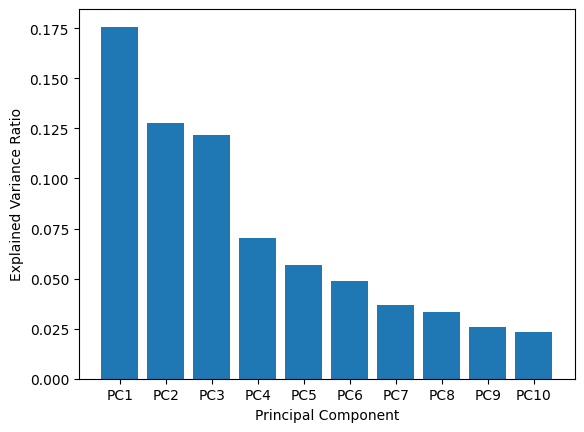

In [60]:
# Performing PCA with 10 components
pca = PCA(n_components=10)

# applying pca on the data
pca.fit(feature_matrix)

# getting pca components
pca_components = pca.fit_transform(feature_matrix)

# getting explained variance ratio
explained_var = pca.explained_variance_ratio_

# making components
components = ['PC' + str(i) for i in range(1, len(explained_var)+1)]

# Creating a dataframe of the explained variance ratio for each component
ev_df = pd.DataFrame({'Component': components, 'Explained Variance Ratio': explained_var})
ev_df = ev_df.sort_values(by='Explained Variance Ratio', ascending=False)

# Ploting the explained variance ratio for each component
plt.bar(ev_df['Component'], ev_df['Explained Variance Ratio'])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()








In [61]:
# Choosing the  3 principal components
pca = PCA(n_components=3)

# applying on data
pca.fit(feature_matrix)

# converting data
pca_df = pd.DataFrame(pca.transform(feature_matrix), columns=['PC1', 'PC2', 'PC3'])

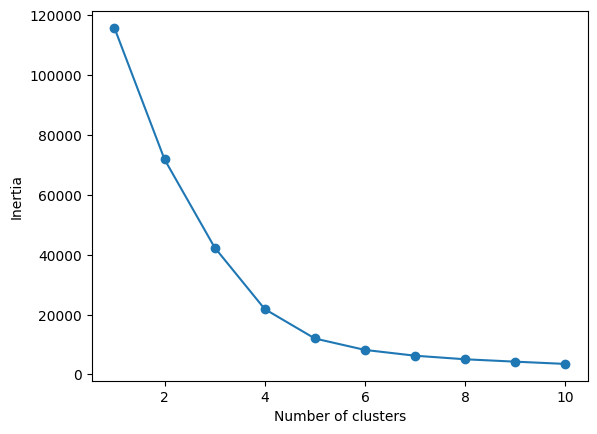

In [62]:
# making an empty list to store inertia for each cluster
inertias = []

# Performing KMeans clustering with 1 to 10 clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)

# Ploting the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


- After 5 clusters the change in inertia is not significant

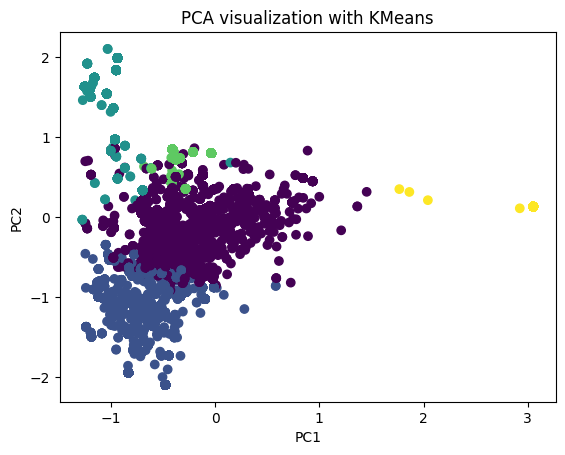

In [64]:
# Choose the number of clusters based on the elbow method 
kmeans = KMeans(n_clusters=5, random_state=42)

# applying the kmeans clustering on the dataset obtained after applying pca for 3 components
kmeans.fit(pca_df)
labels = kmeans.labels_

# Visualize the clustering results in 2D using the first two principal components
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=labels)
plt.title("PCA visualization with KMeans")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# PCA with DBSCA

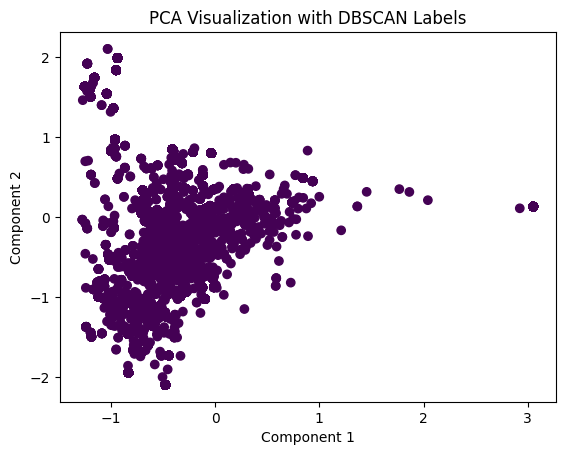

In [65]:
# Performing DBSCAN clustering
dbscan_pca= DBSCAN(eps=3, min_samples=2)

# getting labels for components obtained after applying pca
dbscan_labels_pca = dbscan_pca.fit_predict(pca_df)

# Plotting PCA visualization with DBSCAN labels
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=dbscan_labels_pca,)
plt.title('PCA Visualization with DBSCAN Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# T-sne

- Note we have to keep number of components for t-sne to less than 4, because the main idea of t-sne is to visualize high-dimentional dataset into 2D or 3D

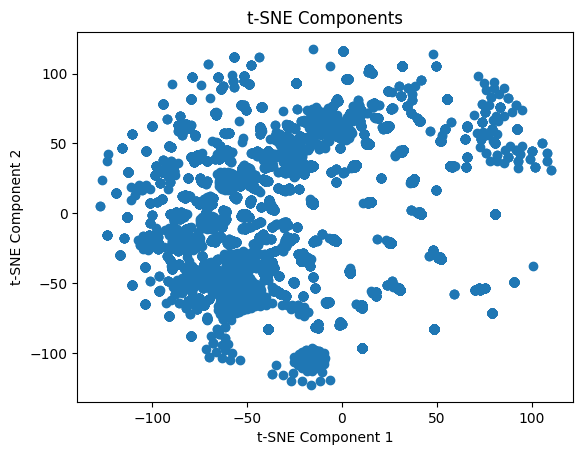

In [67]:
# creating t-SNE object
tsne = TSNE(n_components=2, random_state=42)

# fitting t-SNE to standardized data
tsne_components = tsne.fit_transform(feature_matrix)

# plotting the t-SNE components
plt.scatter(tsne_components[:, 0], tsne_components[:, 1])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Components")
plt.show()





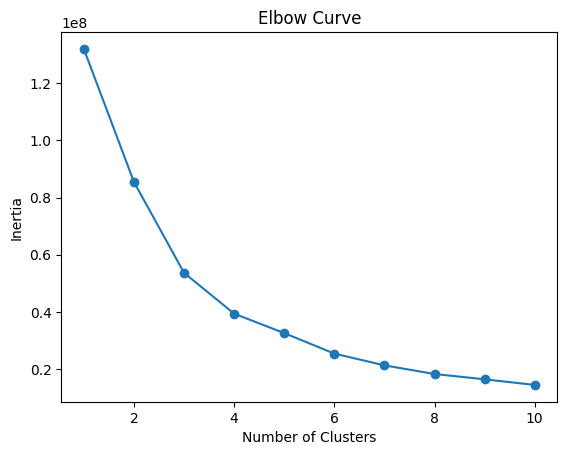

In [68]:
# applying KMeans clustering to the t-SNE components
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_components)
    inertias.append(kmeans.inertia_)

# plotting the elbow curve
plt.plot(range(1, 11), inertias, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()

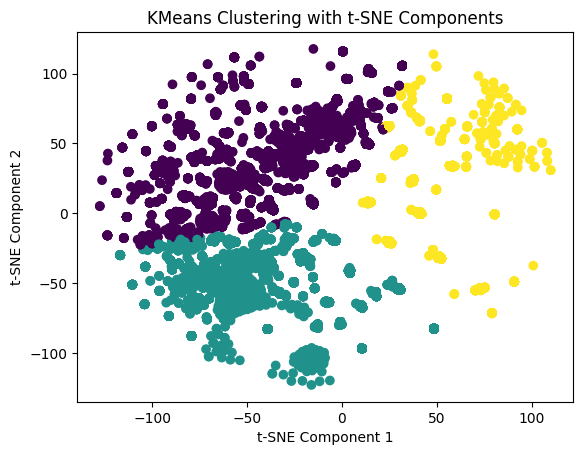

In [69]:
# choosing the appropriate number of clusters
num_clusters = 3

# performing KMeans clustering with chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(tsne_components)

# ploting the data using t-SNE components and color by clustering labels
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=labels)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("KMeans Clustering with t-SNE Components")
plt.show()

# Applying DBSCAN after applying t-sne

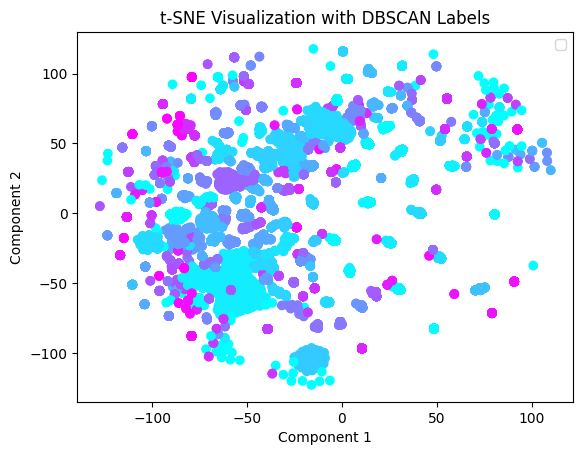

In [70]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan_labels = dbscan.fit_predict(tsne_components)

# Plot t-SNE visualization with  DBSCAN labels
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=dbscan_labels, cmap='cool')
plt.title('t-SNE Visualization with DBSCAN Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

# Applying PCA than t-sne and than KMeans

In [71]:
# Applying PCA to reduce the dimensionality of the data
pca = PCA(n_components=10)
pca_data = pca.fit_transform(feature_matrix)

# Applying t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(pca_data)

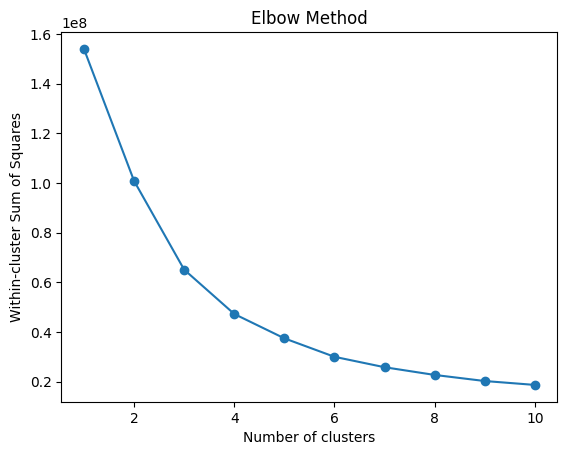

In [73]:
# Determining the optimal number of clusters using the elbow method
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(tsne_data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertias,marker="o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

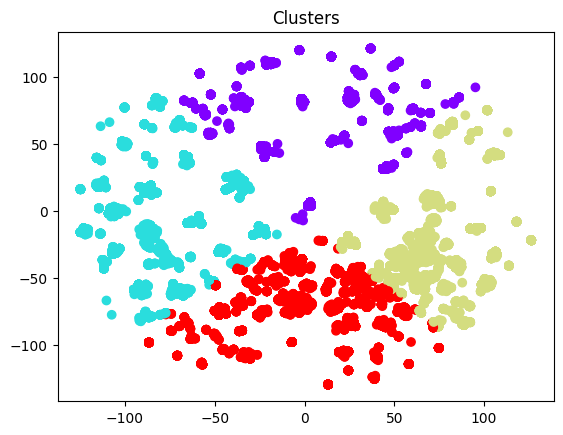

In [74]:
# Run k-means clustering with the optimal number of clusters
k = 4  # Change this to the optimal number of clusters determined by the elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tsne_data)

# Plot the data points with the assigned cluster labels
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('Visualization For KMeans')
plt.show()

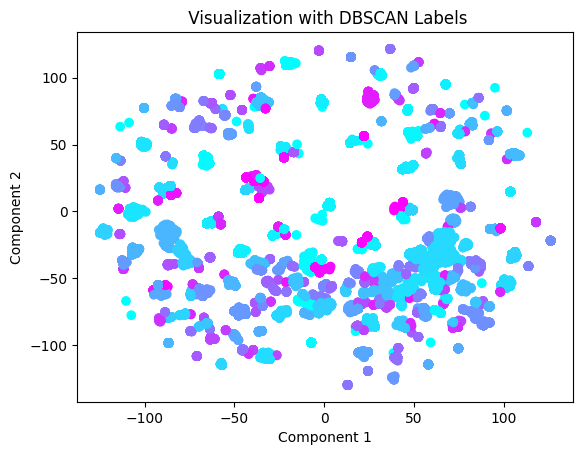

In [76]:
# Performing DBSCAN clustering on the t-sne data
dbscan_pca_tsne = DBSCAN(eps=3, min_samples=2)
dbscan_labels_pca_tsne = dbscan_pca_tsne.fit_predict(tsne_data)

# Plot t-SNE visualization with  DBSCAN labels
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=dbscan_labels_pca_tsne, cmap='cool')
plt.title(' Visualization with DBSCAN Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()